In [1]:
%env PYTHONHASHSEED=0
#import QCPipe #Contains functions required for the QC portion of this pipeline
import dropkick as dk #Contains dropkick functions
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

env: PYTHONHASHSEED=0


In [2]:
sc.set_figure_params(dpi=80) #Set figure size to 200 dpi for legibility
sc.settings.verbosity = 3 #Set scanpy verbosity to 3 for in depth function run information

In [3]:
import random
np.random.seed(56)
random.seed(56)

In [4]:
adata1 = sc.read_h5ad('8434-1-filtered.h5ad')
adata2 = sc.read_h5ad('8434-2-filtered.h5ad')
adata3 = sc.read_h5ad('8434-3-filtered.h5ad')

In [5]:
batch_name = ['8434-1','8434-2','8434-3']

In [6]:
adata = adata1.concatenate([adata2,adata3],join='outer',fill_value=0,batch_categories=batch_name)

/home/yilin/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [8]:
adata.write_h5ad('8434_concat.h5ad',compression='gzip')

In [4]:
adata = sc.read_h5ad('8434_concat.h5ad')

In [5]:
adata.obs['batch'].value_counts()

8434-3    1839
8434-1    1744
8434-2     937
Name: batch, dtype: int64

In [6]:
adata

AnnData object with n_obs × n_vars = 4520 × 31176
    obs: 'dropkick_score', 'batch'

In [7]:
adata.raw = adata

In [8]:
sc.pp.normalize_total(adata)
adata.X = np.arcsinh(adata.X).copy()
sc.pp.scale(adata)
sc.pp.pca(adata,random_state=0)
neighborhood_k = np.sqrt(adata.n_obs).astype(int) 
sc.pp.neighbors(adata,n_neighbors=neighborhood_k,use_rep='X_pca',random_state=0)
sc.tl.umap(adata,min_dist=0.25,random_state=0)
sc.tl.leiden(adata,resolution=2,random_state=0)

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:13)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


In [14]:
sc.set_figure_params(transparent=True)

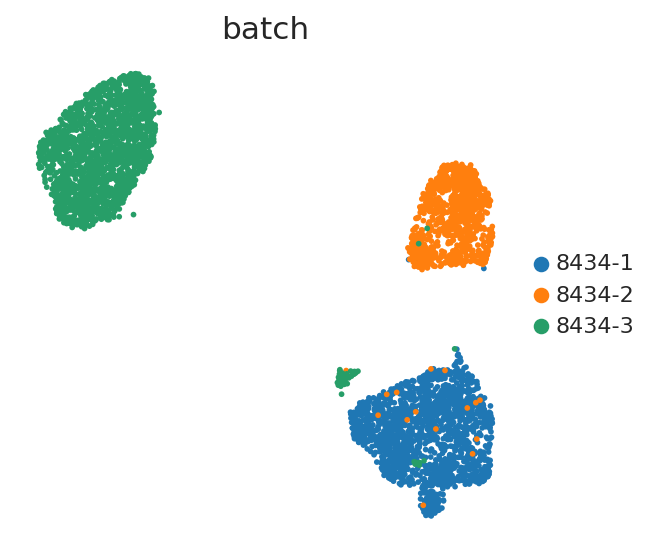

In [11]:
sc.pl.umap(adata,color=['batch'],legend_fontoutline=True,legend_fontsize=10,cmap='viridis',ncols=3,save='batch.pdf',wspace=0.3,frameon=False)

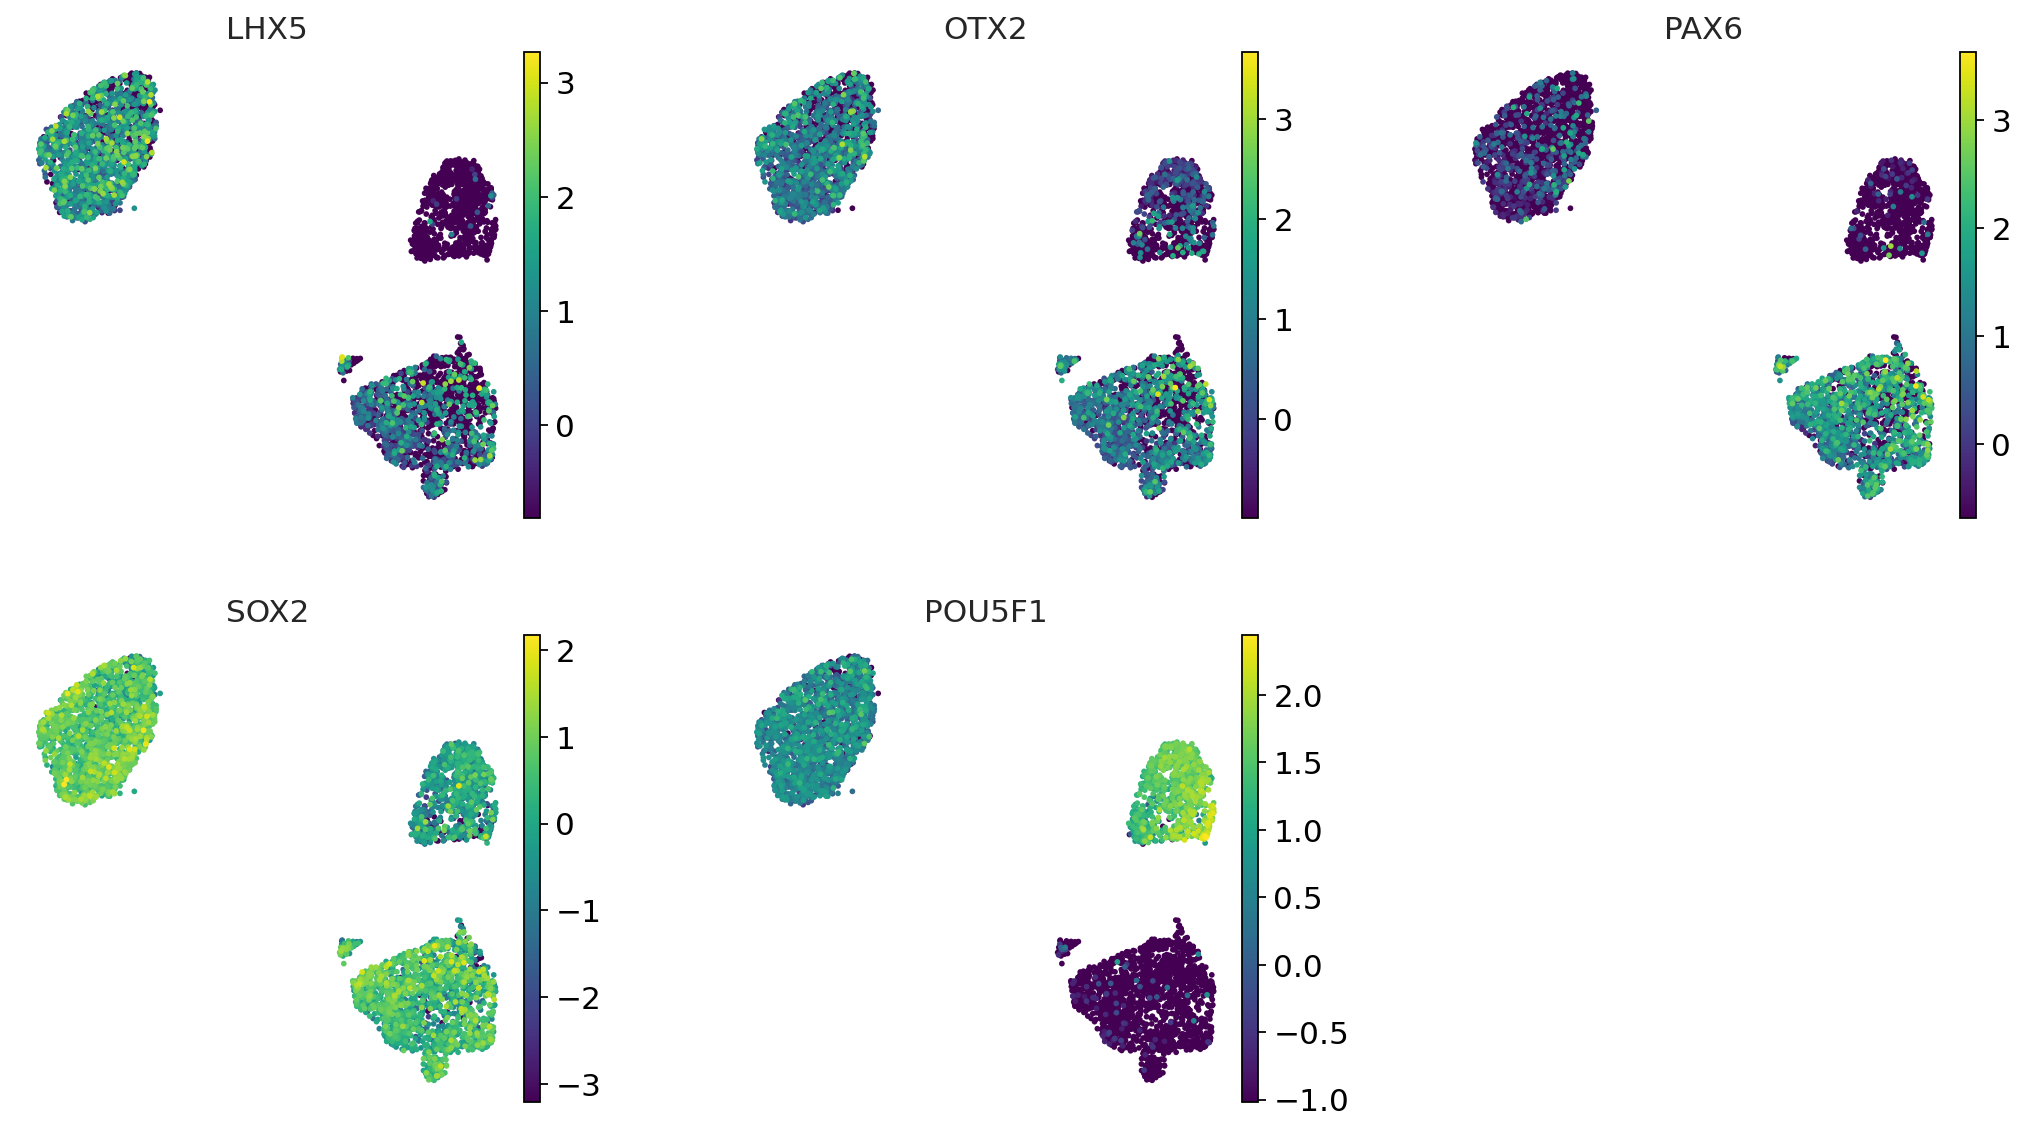

In [12]:
sc.pl.umap(adata,color=['LHX5','OTX2','PAX6','SOX2','POU5F1'],legend_fontoutline=True,legend_fontsize=10,cmap='viridis',ncols=3,save='gene.pdf',wspace=0.3,frameon=False,use_raw=False)